# Product Management Sprint 6: Conjoint Analysis on Restaurant Satisfaction 

Kevin Chen (kc695)

Arvind Rishi (ar2352)

Zaid Hassan (mz592)

Deepanjali Kajagar (dk752)

May 3rd, 2024 

## Introduction 

Customer satisfaction is an integral metric in the hospitality industry. Providing excellent customer service is essential for restaurant success; it creates loyal patrons, drives positive ratings on review sites, increases tips that servers receive, and generates new demand from recommendations customers tell their family and friends. While traditional notions of customer satisfaction are based on simple assumptions of providing friendly and fast service, we wanted to analyze more concrete factors that affect customer satisfaction. Acting as product/restaurant manager for Applebees, we gathered over 1,000 customers responses who have dined at our restaurant and analyzed various factors that might affect customer satisfaction including day of week dined, service speed, ambiance, and friendliness. Then, we employed a conjoint analysis to rank and analyze drivers of customer satisfaction as well as tip percentage in the hopes of focusing all our efforts to improve on the factors that matter to the diners. 

### Source of Data 

The source of the data comes from Cornell Nolan Professor Michael Lynn who specializes in consumer behavior and marketing. His original paper titled “A Comparison of Asians’, Hispanics’, and Whites’, Restaurant Tipping” published in the Journal of Applied Social Psychology sought to find statistical significance in the differences between racial groups and their tip percentage compared to their total bill. The company who collected and compiled the dataset, Mindshare Technologies, conducted 1,345 customer satisfaction surveys of customers who dined at “a large, multi-state, bi-coastal, restaurant chain.” Although our scope doesn’t involve analyzing racial groups and their tipping rate, other dimensions from the survey (overall satisfaction, day dined, would recommend, meal quality, cleanliness, speed, etc.) allow us still to conduct conjoint analysis on factors that affect customer satisfaction. 

### Method of Conjoint Analysis

We are setting customer satisfaction and "Would Recommend" as the key performance metrics we are measuring against. We first cleaned the data, removed null values, and then employed a conjoint analysis to determine how various factors influenced customer satisfaction and increased tip percentage. Factors considered included both internal service metrics such as 'Meal Quality' and 'Overall Service', and external drivers like 'Day Dined' and 'Meal Period.' Using the statsmodels library, a series of multiple regression analyses were conducted to explore the relationships between these factors and the performance metrics defined. The conjoint analysis focused on determining the part-worth utility values for each level of the key attributes with the goal of exploring diner's preferences and trade-offs they make between different service elements, helping restaurant managers understand what aspects of the dining experience are most valuable to customers and where improvements can be targeted to enhance customer satisfaction and loyalty.

In [126]:
# Import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set(style="darkgrid")

In [127]:
# Load the data
df_raw = pd.read_csv('./restaurant-survey-dataset.csv')

df_raw.head()

,Bill Amount,Who Tipped,Tip Amount,Ethnicity,Day Dined,Meal Period,How Dined,Overall Satisfaction,Will Return,Would Recommend,Greeted Friendly,Meal Quality,Overall Service,"Music, Lighting, Temp.",Cleanliness,Food Delivery Speed,Bev. Service Speed,Offered Appetizer
0,$16.80,Me,$5.00,White,Sat,Lunch,Dine In,Excellent,Definitely Will,Definitely Would,Yes,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Don't Remember
1,$28.40,Me,$6.00,White,Mon,Dinner,Dine In,Excellent,Definitely Will,Definitely Would,Yes,Excellent,Very Good,Very Good,Excellent,Very Good,Excellent,Don't Remember
2,$21.00,Me,$3.40,Asian,Wed,Lunch,Dine In,Very Good,Definitely Will,Definitely Would,Yes,Excellent,Very Good,Excellent,Excellent,Very Good,Very Good,No
3,$52.61,Me,$7.39,Other,Sun,Dinner,Dine In,Very Good,Might or Might Not,Might or Might Not,Yes,Good,Excellent,Very Good,Very Good,Very Good,Very Good,No
4,$20.16,Me,$4.00,White,Thu,Lunch,Dine In,Excellent,Definitely Will,Definitely Would,Yes,Excellent,Very Good,Excellent,Excellent,Excellent,Excellent,Yes


### Identify Performance Metrics

* Tip Percentage
* Overall Satisfaction
* Will Return
* Would Recommend

### Identify Key External Drivers
* Day Dined
* Meal Period
* Ethnicity
* How Dined

### Identify Factors for Conjoint Analysis
* Greeted Friendly
* Meal Quality
* Overall Service
* Music, Lighting, Temperature
* Cleanliness
* Food Delivery Speed
* Beverage Service Speed
* Offered Appetizer

In [128]:
# Print Information about the data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Bill Amount             1345 non-null   object
 1   Who Tipped              1345 non-null   object
 2   Tip Amount              1338 non-null   object
 3   Ethnicity               1345 non-null   object
 4   Day Dined               1345 non-null   object
 5   Meal Period             1345 non-null   object
 6   How Dined               1345 non-null   object
 7   Overall Satisfaction    1345 non-null   object
 8   Will Return             1345 non-null   object
 9   Would Recommend         1345 non-null   object
 10  Greeted Friendly        1345 non-null   object
 11  Meal Quality            1345 non-null   object
 12  Overall Service         1345 non-null   object
 13  Music, Lighting, Temp.  1345 non-null   object
 14  Cleanliness             1345 non-null   object
 15  Food

In [129]:
# Print number of null values in each column
df_raw.isnull().sum()

Bill Amount               0
Who Tipped                0
Tip Amount                7
Ethnicity                 0
Day Dined                 0
Meal Period               0
How Dined                 0
Overall Satisfaction      0
Will Return               0
Would Recommend           0
Greeted Friendly          0
Meal Quality              0
Overall Service           0
Music, Lighting, Temp.    0
Cleanliness               0
Food Delivery Speed       0
Bev. Service Speed        0
Offered Appetizer         0
dtype: int64

In [130]:
# Set all null values in the "Tip Amount " column to 0
df_raw['Tip Amount'] = df_raw['Tip Amount'].fillna(0)

df_raw.isnull().sum()

Bill Amount               0
Who Tipped                0
Tip Amount                0
Ethnicity                 0
Day Dined                 0
Meal Period               0
How Dined                 0
Overall Satisfaction      0
Will Return               0
Would Recommend           0
Greeted Friendly          0
Meal Quality              0
Overall Service           0
Music, Lighting, Temp.    0
Cleanliness               0
Food Delivery Speed       0
Bev. Service Speed        0
Offered Appetizer         0
dtype: int64

In [131]:
# Print the unique values in all columns except "Bill Amount" and "Tip Amount" as a dataframe
unique_values = pd.DataFrame()

for column in df_raw.columns:
    if column not in ['Bill Amount', 'Tip Amount']:
        # Set first column as the column name and second column as the unique values in the column
        unique_values[column] = [", ".join(list(df_raw[column].unique()))]


In [132]:
# Print the transposed dataframe without truncation
pd.set_option('display.max_columns', None)

unique_values["Overall Service"]

0    Excellent, Very Good, Good, Fair, Poor - Poor
Name: Overall Service, dtype: object

In [133]:
# Enumerate the unique levels of the categorical variables
satisfaction_scale = {
    'Poor': 0,
    'Poor - Poor': 0,
    'Fair': 0.25,
    'Good': 0.5,
    'Very Good': 0.75,
    'Excellent': 1
}

conviction_scale_will = {
    'Definitely Not': 0,
    'Probably Not': 0.25,
    'Might or Might Not': 0.5,
    'Probably Will': 0.75,
    'Definitely Will': 1
}

conviction_scale_would = {
    'Definitely Would Not': 0,
    'Probably Would Not': 0.25,
    'Might or Might Not': 0.5,
    'Probably Would': 0.75,
    'Definitely Would': 1
}

yes_no_scale = {'Yes': 1, 'No': 0, "Don't Remember": 0.5}



In [134]:
# Apply one-hot encoding to the 'Offered Appetizer' column with specific column names
offered_appetizer_dummies = pd.get_dummies(df_raw['Offered Appetizer'], prefix='Offered_Appetizer')

column_mapping = {
    'Offered_Appetizer_Don\'t Remember': 'Offered_Appetizer_Dont_Remember',
    'Offered_Appetizer_No': 'Offered_Appetizer_No',
    'Offered_Appetizer_Yes': 'Offered_Appetizer_Yes'
}

offered_appetizer_dummies.rename(columns=column_mapping, inplace=True)

df_with_dummies = pd.concat([df_raw, offered_appetizer_dummies], axis=1)

# Deepcopy df_with_dummies to df
df = df_with_dummies.copy()

df['Offered_Appetizer_Dont_Remember'] = df['Offered_Appetizer_Dont_Remember'].astype(int)
df['Offered_Appetizer_No'] = df['Offered_Appetizer_No'].astype(int)
df['Offered_Appetizer_Yes'] = df['Offered_Appetizer_Yes'].astype(int)

df.head()

,Bill Amount,Who Tipped,Tip Amount,Ethnicity,Day Dined,Meal Period,How Dined,Overall Satisfaction,Will Return,Would Recommend,Greeted Friendly,Meal Quality,Overall Service,"Music, Lighting, Temp.",Cleanliness,Food Delivery Speed,Bev. Service Speed,Offered Appetizer,Offered_Appetizer_Dont_Remember,Offered_Appetizer_No,Offered_Appetizer_Yes
0,$16.80,Me,$5.00,White,Sat,Lunch,Dine In,Excellent,Definitely Will,Definitely Would,Yes,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Don't Remember,1,0,0
1,$28.40,Me,$6.00,White,Mon,Dinner,Dine In,Excellent,Definitely Will,Definitely Would,Yes,Excellent,Very Good,Very Good,Excellent,Very Good,Excellent,Don't Remember,1,0,0
2,$21.00,Me,$3.40,Asian,Wed,Lunch,Dine In,Very Good,Definitely Will,Definitely Would,Yes,Excellent,Very Good,Excellent,Excellent,Very Good,Very Good,No,0,1,0
3,$52.61,Me,$7.39,Other,Sun,Dinner,Dine In,Very Good,Might or Might Not,Might or Might Not,Yes,Good,Excellent,Very Good,Very Good,Very Good,Very Good,No,0,1,0
4,$20.16,Me,$4.00,White,Thu,Lunch,Dine In,Excellent,Definitely Will,Definitely Would,Yes,Excellent,Very Good,Excellent,Excellent,Excellent,Excellent,Yes,0,0,1


In [135]:
# Map the satisfaction and conviction scales to the respective columns
df['Overall Satisfaction'] = df['Overall Satisfaction'].map(satisfaction_scale)
df['Meal Quality'] = df['Meal Quality'].map(satisfaction_scale)
df['Overall Service'] = df['Overall Service'].map(satisfaction_scale)
df['Music, Lighting, Temp.'] = df['Music, Lighting, Temp.'].map(satisfaction_scale)
df['Cleanliness'] = df['Cleanliness'].map(satisfaction_scale)
df['Food Delivery Speed'] = df['Food Delivery Speed'].map(satisfaction_scale)
df['Bev. Service Speed'] = df['Bev. Service Speed'].map(satisfaction_scale)

df['Will Return'] = df['Will Return'].map(conviction_scale_will)

df['Would Recommend'] = df['Would Recommend'].map(conviction_scale_would)

# Replace "Yes" and "No" with 1 and 0 respectively in the "Greeted Friendly" column
df['Greeted Friendly'] = df['Greeted Friendly'].replace(yes_no_scale)

# Convert the "Bill Amount" and "Tip Amount" columns to float
df['Bill Amount'] = df['Bill Amount'].str.replace('$', '').str.replace(',', '').astype(float)
df['Tip Amount'] = df['Tip Amount'].str.replace('$', '').str.replace(',', '').astype(float)

df.head()

,Bill Amount,Who Tipped,Tip Amount,Ethnicity,Day Dined,Meal Period,How Dined,Overall Satisfaction,Will Return,Would Recommend,Greeted Friendly,Meal Quality,Overall Service,"Music, Lighting, Temp.",Cleanliness,Food Delivery Speed,Bev. Service Speed,Offered Appetizer,Offered_Appetizer_Dont_Remember,Offered_Appetizer_No,Offered_Appetizer_Yes
0,16.80,Me,5.00,White,Sat,Lunch,Dine In,1.00,1.0,1.0,1,1.0,1.00,1.00,1.00,1.00,1.00,Don't Remember,1,0,0
1,28.40,Me,6.00,White,Mon,Dinner,Dine In,1.00,1.0,1.0,1,1.0,0.75,0.75,1.00,0.75,1.00,Don't Remember,1,0,0
2,21.00,Me,3.40,Asian,Wed,Lunch,Dine In,0.75,1.0,1.0,1,1.0,0.75,1.00,1.00,0.75,0.75,No,0,1,0
3,52.61,Me,7.39,Other,Sun,Dinner,Dine In,0.75,0.5,0.5,1,0.5,1.00,0.75,0.75,0.75,0.75,No,0,1,0
4,20.16,Me,4.00,White,Thu,Lunch,Dine In,1.00,1.0,1.0,1,1.0,0.75,1.00,1.00,1.00,1.00,Yes,0,0,1


In [136]:
# Print number of null values in each column
df.isnull().sum()

Bill Amount                        0
Who Tipped                         0
Tip Amount                         7
Ethnicity                          0
Day Dined                          0
Meal Period                        0
How Dined                          0
Overall Satisfaction               0
Will Return                        0
Would Recommend                    0
Greeted Friendly                   0
Meal Quality                       0
Overall Service                    0
Music, Lighting, Temp.             0
Cleanliness                        0
Food Delivery Speed                0
Bev. Service Speed                 0
Offered Appetizer                  0
Offered_Appetizer_Dont_Remember    0
Offered_Appetizer_No               0
Offered_Appetizer_Yes              0
dtype: int64

### Qualitative Analysis of External Drivers

#### 1. The plot of average overall satisfaction by day dined, with each day of the week.

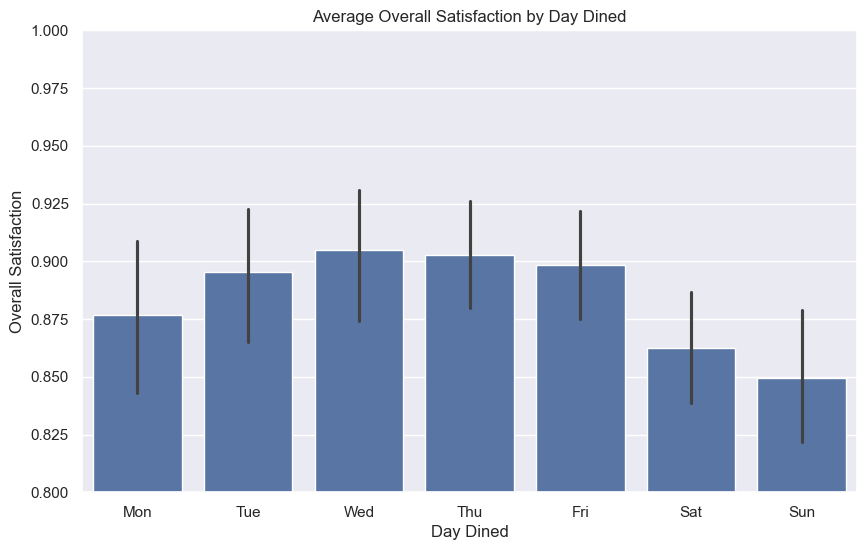

In [165]:
# Plot a bar chart of the average "Overall Satisfaction" by "Day Dined"
plt.figure(figsize=(10, 6))
# Order the days of the week
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
sns.barplot(x='Day Dined', y='Overall Satisfaction', data=df, order=days)
plt.ylim(0.8, 1)
plt.title('Average Overall Satisfaction by Day Dined')
plt.show()

The bar chart presents the average overall satisfaction by day dined, with each day of the week displayed.From Monday to Sunday, satisfaction levels appear generally consistent, although there are some variations:
* Weekday vs. Weekend Satisfaction: The average satisfaction from Monday to Friday remains fairly stable and high, with slight fluctuations. Interestingly, satisfaction dips during the weekend, with Saturday showing a more significant drop compared to Sunday. 
This could be due to more crowd over the weekend and hence the decline in service, which resulted in lower satisfaction.
* Thursday appears to have the highest average satisfaction, closely followed by Tuesday, suggesting that midweek might offer a better dining experience. Conversely, Saturday shows the lowest average satisfaction, which could be due to the factors previously mentioned like larger crowds and potentially longer wait times.

#### 2. The plot of factors "Meal Quality", "Food Delivery Speed", and "Beverage Service Speed" on each day of hte week.

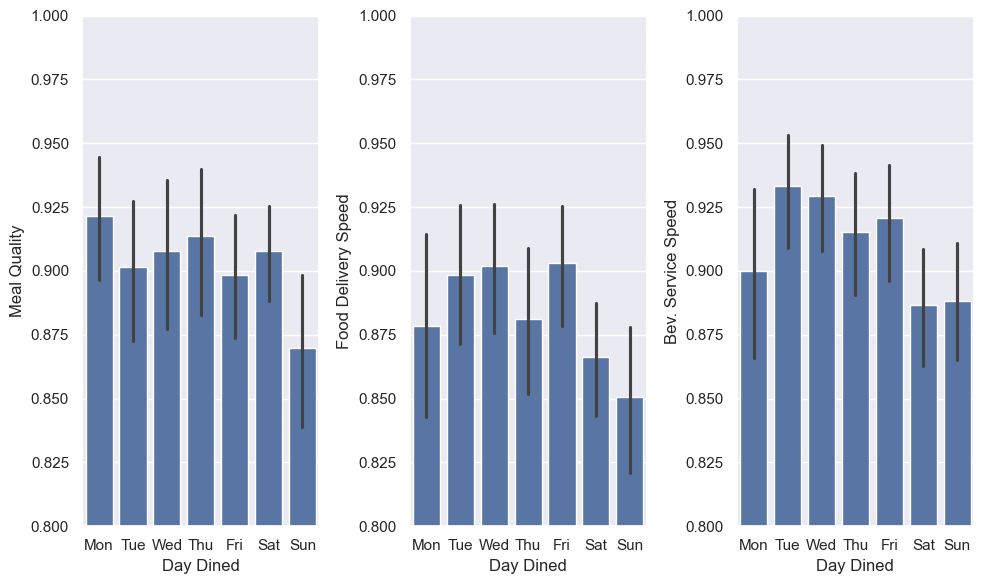

In [164]:
# Plot a bar chart of the average "Meal Quality", "Food Delivery Speed" and "Bev. Service Speed" by "Day Dined" side by side with a y-axis range from 0.8 to 1.0
plt.figure(figsize=(10, 6))

# Create a subplot with 1 row and 3 columns
plt.subplot(1, 3, 1)
sns.barplot(x='Day Dined', y='Meal Quality', data=df, order=days)
plt.ylim(0.8, 1.0)

plt.subplot(1, 3, 2)
sns.barplot(x='Day Dined', y='Food Delivery Speed', data=df, order=days)
plt.ylim(0.8, 1.0)

plt.subplot(1, 3, 3)
sns.barplot(x='Day Dined', y='Bev. Service Speed', data=df, order=days)
plt.ylim(0.8, 1.0)

plt.tight_layout()

From the above Bar Chart we can deduce that - 
* The average meal quality appears fairly consistent across the week, with minor fluctuations. 
The highest quality seems to occur midweek, particularly on Wednesday and Thursday, while the lowest points are on the weekend, particularly Sunday. This might indicate that kitchen performance could be strained during busier weekend periods or when different staff may be on duty.
* The speed of food delivery shows more variation compared to meal quality. The fastest delivery occurs on Wednesday, suggesting efficient kitchen operations, possibly due to moderate customer traffic. The weekends, particularly Saturday, show a notable decline in delivery speed, likely due to increased demand which could be overloading kitchen capacities.
* Beverage service speed also varies, with a noticeable decrease in speed on Fridays and Sundays. This could be attributed to higher bar traffic or potentially overloading kitchen capacities.

In [138]:
# Create a new column "Tip Percentage" which is the percentage of the tip amount with respect to the bill amount
df['Tip Percentage'] = (df['Tip Amount'] / df['Bill Amount']) * 100

#### 3. Plot illustrating the distribution of tip percentage across different ethnicities.

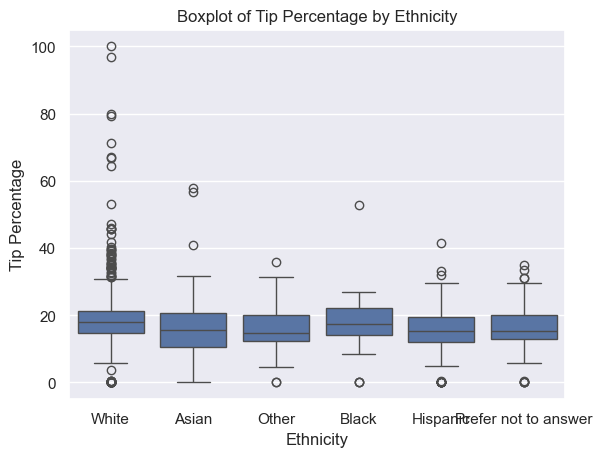

In [166]:
# Plot "Tip Percentage" vs "Ethnicty" as a boxplot
sns.boxplot(data=df[df["Tip Percentage"] <= 100], x='Ethnicity', y='Tip Percentage')
plt.xlabel('Ethnicity')
plt.ylabel('Tip Percentage')
plt.title('Boxplot of Tip Percentage by Ethnicity')
# Show the plot
plt.show()

The boxplot illustrates the distribution of tip percentage across different ethnicities. From the graph we can deduce that - 
* The median tip percentage is relatively consistent across ethnic groups, typically ranging around 15-20%.
* The White and "Other" categories show a wider range of tip percentages, indicating more variability in tipping behavior.
* The interquartile ranges for Asian, Black, and Hispanic are somewhat similar, suggesting a more consistent tipping pattern within these groups.

This visualization helps in understanding the different tipping behaviors among various ethnic groups, although it’s essential to approach such data with sensitivity to avoid stereotyping.

#### 4. The plot of Average Overall Satisfaction by Ethnicity

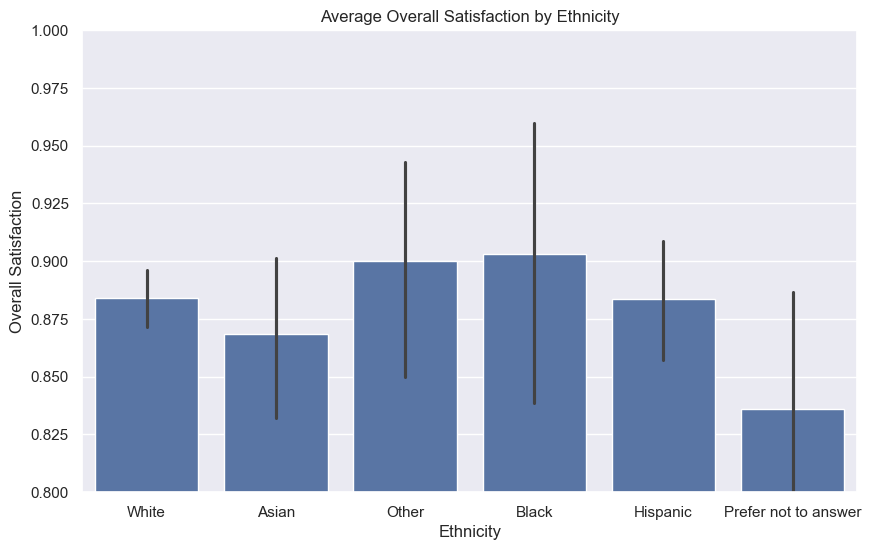

In [171]:
# Plot a bar chart of the average "Overall Satisfaction" by "Ethnicity"
plt.figure(figsize=(10, 6))
# Order the days of the week
sns.barplot(x='Ethnicity', y='Overall Satisfaction', data=df)
plt.ylim(0.8, 1)
plt.title('Average Overall Satisfaction by Ethnicity')
plt.show()

The bar chart depicts the average overall satisfaction by ethnicity, offering insights into how different ethnic groups rated their dining experiences. 
* Satisfaction levels across all ethnic groups generally range from approximately 0.875 to 0.950 on the scale, indicating a relatively high level of contentment among diners.
* These differences in satisfaction could be influenced by various factors, including service quality, food selection, cultural preferences, or even individual expectations.

#### 5. Plot illustrating the tip percentages by meal period (lunch and dinner) across different days of the week. 

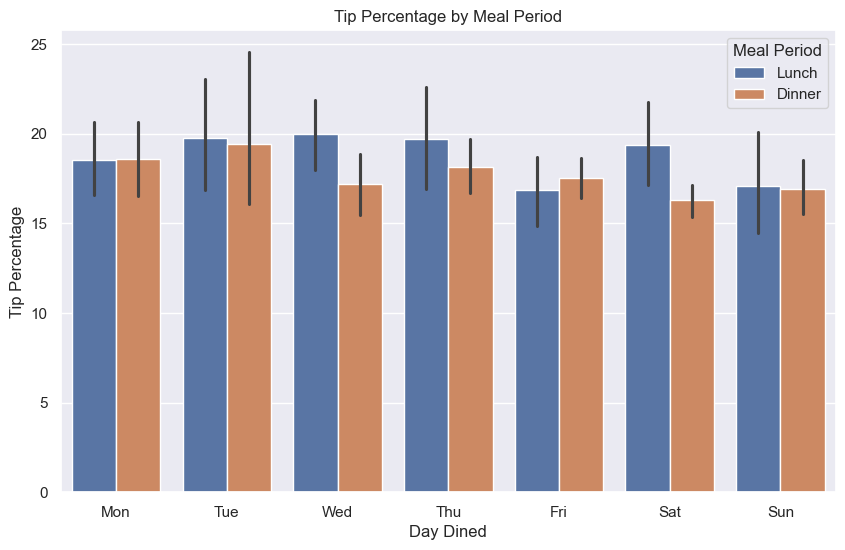

In [174]:
# Plot a barplot of "Tip Percentage" by "Meal Period" grouped by "Day Dined"
plt.figure(figsize=(10, 6))
sns.barplot(x='Day Dined', y='Tip Percentage', data=df, hue='Meal Period', order=days)
plt.title('Tip Percentage by Meal Period')
plt.show()

From the above given bar graph, we can deduce that - 
* Tips during lunchtime are consistently higher from Monday through Thursday. This pattern may suggest that the restaurant is situated near business districts, attracting a professional crowd who dine out for lunch during workdays.
* As expected, Friday evenings see a spike in tip percentages at dinner, likely reflecting the start of the weekend when people are more inclined to dine out leisurely, celebrate, and tip generously.
* Notably, Saturday shows a slight decrease in tip percentages for dinner compared to other days, which might be due to higher traffic and possibly rushed service.

#### 6. Correlation matrix

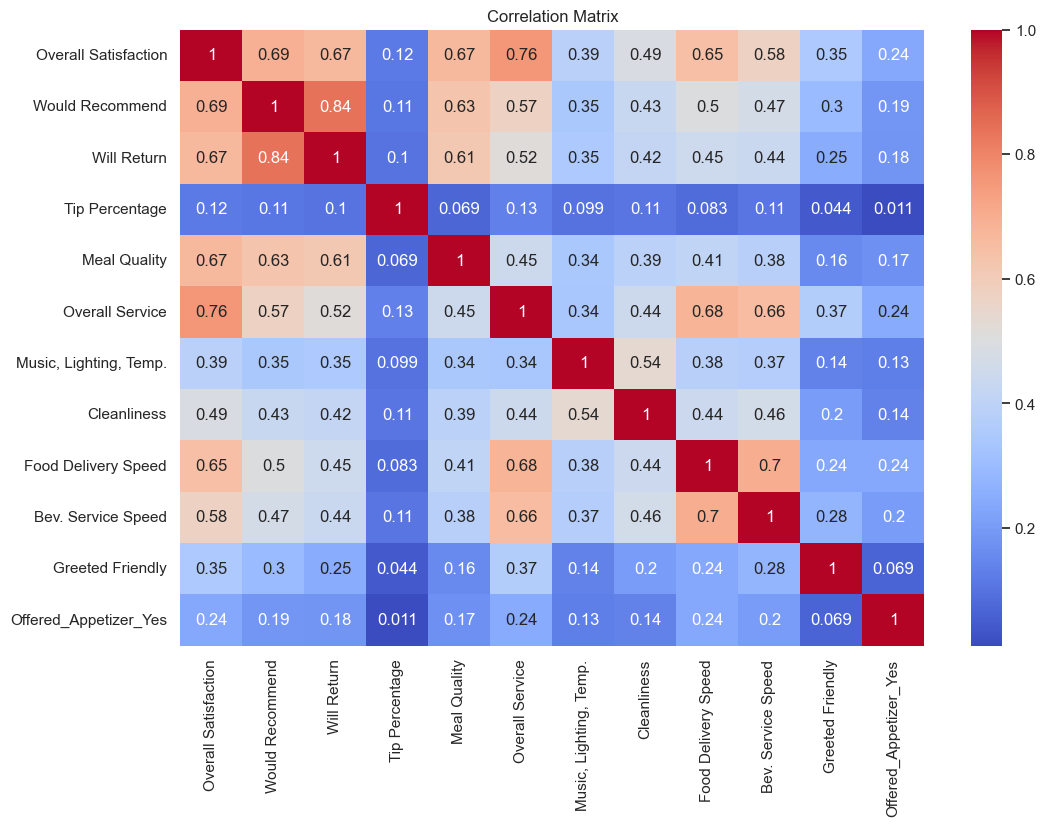

In [140]:
# Create a correlation matrix of the following columns: "Overall Satisfaction", "Meal Quality", "Overall Service", "Tip Percentage", "Music, Lighting, Temp.", "Cleanliness", "Food Delivery Speed", "Bev. Service Speed", "Will Return", "Would Recommend"

correlation_matrix = df[
    ['Overall Satisfaction', 'Would Recommend','Will Return', 'Tip Percentage', 'Meal Quality', 'Overall Service', 'Music, Lighting, Temp.', 'Cleanliness', 'Food Delivery Speed', 'Bev. Service Speed', 'Greeted Friendly', 'Offered_Appetizer_Yes']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Some Takeaways from the Coorelational Heat Map

* Tip doesn't correlate with anything
* Customers tend to value Meal Quality the most
* The overall service is the second most important factor
* The third most important factor is the food and beverage delivery speed
* The customer's perception of the overall service depends on the speed of the food and beverage delivery
* The ambience - music, lighting, and temperature and cleanliness are the least important factors

### Conjoint Analysis for Evaluating Impact of Dining Experience Factors on Overall Satisfaction
The conjoint analysis helps us analyze various aspects of the dining experience that influence guest satisfaction. This statistical approach, helps identify which factors—ranging from meal quality and overall service to ambiance elements like music, lighting, and temperature—are most critical in shaping diners' satisfaction. By incorporating factors such as cleanliness, food and beverage service speed, and initial customer interactions, the model quantifies their relative importance. 

In [141]:
# Step 3: Define performance/choice indicators and factors
indicator = ['Overall Satisfaction']
factors = ['Meal Quality', 'Overall Service', 'Music, Lighting, Temp.', 'Cleanliness', 'Food Delivery Speed', 'Bev. Service Speed', 'Greeted Friendly', 'Offered_Appetizer_Yes', 'Offered_Appetizer_No', 'Offered_Appetizer_Dont_Remember']

# Step 4: Perform the conjoint analysis
X = df[factors]
Y = df[indicator]

X = sm.add_constant(X)  # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Step 5: Display the importance of each factor
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Overall Satisfaction   R-squared:                       0.734
Model:                              OLS   Adj. R-squared:                  0.733
Method:                   Least Squares   F-statistic:                     410.1
Date:                  Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                          11:27:53   Log-Likelihood:                 1199.3
No. Observations:                  1345   AIC:                            -2379.
Df Residuals:                      1335   BIC:                            -2327.
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.1315      0.017     -7.577      0.000      -0.165      -0.097
Meal Quality                        0.3943      0.018     22.447      0.000       0.360       0.429
Overall Service                     0.4441      0.023     19.253      0.000       0.399       0.489
Music, Lighting, Temp.              0.0098      0.019      0.520      0.603      -0.027       0.047
Cleanliness                         0.0894      0.024      3.708      0.000       0.042       0.137
Food Delivery Speed                 0.1599      0.022      7.320      0.000       0.117       0.203
Bev. Service Speed                 -0.0241      0.024     -1.005      0.315      -0.071       0.023
Greeted Friendly                    0.0953      0.017      5.653      0.000       0.062       0.128
Offered_Appetizer_Yes              -0.0393      0.007     -5.367      0.000      -0.054      -0.025
Offered_Appetizer_No               -0.0505      0.006     -8.131      0.000      -0.063      -0.038
Offered_Appetizer_Dont_Remember    -0.0416      0.008     -5.314      0.000      -0.057      -0.026
==============================================================================
Omnibus:                      458.627   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3744.378
Skew:                          -1.351   Prob(JB):                         0.00
Kurtosis:                      10.714   Cond. No.                     2.42e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Based on the Conjoint Analysis results, there are the factors influencing overall satisfaction in descending order of importance, based on their statistical significance and the magnitude of their coefficients:
1. Overall Service with 0.444 coefficient and a very low p-value, is the most significant predictor of overall satisfaction. This  indicates strong positive influence on satisfaction.
2. Meal Quality with 0.3943 coefficient significantly impacts customer satisfaction.
3. Next is Food Delivery Speed with Coefficient of 0.1599.
4. Next significant factor is Greeted Friendly with Coefficient 0.0953.

### What this Ordinary Least Squares (OLS) Regression Analysis Tells Us

When comparing various factors including meal quality, food delivery speed, and ambiance against customer satisfaction, some strong coorelational trends emerged. For example, although it was expected, meal quality and overall service are both signifigant predictors with positive coefficients (0.3943 and 0.4441 respectively), suggesting that improvements in these areas are associated with higher overall satisfaction. Another interesting insight is that music, lighting, and temperature, although it has a slight positive coorelation, is not statistically signifigant as its p-value is <.05, meaning ambiance has a negligible impact on customer satisfaction. Quite interestingly, offering appetizers has a negative coorelation with customer service, indicating that offering or memory of appetizers might have been associated with a negative impact on satisfaction, possibly due to expectations not being met or other contextual factors. Overall, the model has an R-squared value of .734 which indicates that 73.4% of the variability in overall satisfaction is explained by the variables included in the model.

In [142]:
# Step 3: Define performance/choice indicators and factors
indicator = ['Would Recommend']

# Step 4: Perform the conjoint analysis
X = df[factors]
Y = df[indicator]

X = sm.add_constant(X)  # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Step 5: Display the importance of each factor
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Would Recommend   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     165.6
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          3.01e-210
Time:                        11:28:21   Log-Likelihood:                 907.00
No. Observations:                1345   AIC:                            -1794.
Df Residuals:                    1335   BIC:                            -1742.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0195      0.022      0.902      0.367      -0.023       0.062
Meal Quality                        0.4263      0.022     19.531      0.000       0.383       0.469
Overall Service                     0.2236      0.029      7.801      0.000       0.167       0.280
Music, Lighting, Temp.              0.0220      0.023      0.935      0.350      -0.024       0.068
Cleanliness                         0.0971      0.030      3.240      0.001       0.038       0.156
Food Delivery Speed                 0.0818      0.027      3.011      0.003       0.028       0.135
Bev. Service Speed                  0.0191      0.030      0.641      0.522      -0.039       0.078
Greeted Friendly                    0.1018      0.021      4.861      0.000       0.061       0.143
Offered_Appetizer_Yes               0.0101      0.009      1.111      0.267      -0.008       0.028
Offered_Appetizer_No                0.0066      0.008      0.851      0.395      -0.009       0.022
Offered_Appetizer_Dont_Remember     0.0028      0.010      0.284      0.776      -0.016       0.022
==============================================================================
Omnibus:                      433.826   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2562.180
Skew:                          -1.368   Prob(JB):                         0.00
Kurtosis:                       9.183   Cond. No.                     2.42e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Based on the OLS regression results where "Would Recommend" serves as the dependent variable, here's an assessment of the factors in order of their importance.
1. Meal Quality with Coefficient, 0.4263. High meal quality strongly correlates with positive recommendations.
2. Overall Service with Coefficient value as 0.2236 is a crucial factor.
3. Greeted Friendly with Coefficient as 0.1018 significantly impacts their likelihood to recommend the establishment. This indicates the importance of first impressions.


### What this OLS Regression Analysis Tells Us 

When analyzing the same factors against a new variable "Would Recommend," the same trend appears. Meal Quality and Overall Service both have a high positive coorelational values and are statistically signifigant, highlighting how these factors increase the likelihood of a person recommending Applebees. Other positive impacts not observed before are cleanliness and "greeted friendly," which, while less than meal quality and overall service, also are observed to increase a customer's likelihood to recommend the restaurant to friends and family. Factors that do not impact "Would Recommend" in the face of the aforementioned factors include ambiance, beverage service speed, and offered appetizer, highlighting that the restaurant needs to deemphasize these factors.

In [143]:
# Define performance/choice indicators and factors
indicator = ['Will Return']

# Perform the conjoint analysis
X = df[factors]
Y = df[indicator]

X = sm.add_constant(X)  # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Display the importance of each factor
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Will Return   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     132.8
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          1.97e-178
Time:                        11:28:22   Log-Likelihood:                 958.55
No. Observations:                1345   AIC:                            -1897.
Df Residuals:                    1335   BIC:                            -1845.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1236      0.021      5.959      0.000       0.083       0.164
Meal Quality                        0.3938      0.021     18.745      0.000       0.353       0.435
Overall Service                     0.1603      0.028      5.809      0.000       0.106       0.214
Music, Lighting, Temp.              0.0403      0.023      1.781      0.075      -0.004       0.085
Cleanliness                         0.1009      0.029      3.497      0.000       0.044       0.157
Food Delivery Speed                 0.0343      0.026      1.312      0.190      -0.017       0.086
Bev. Service Speed                  0.0433      0.029      1.507      0.132      -0.013       0.100
Greeted Friendly                    0.0644      0.020      3.194      0.001       0.025       0.104
Offered_Appetizer_Yes               0.0466      0.009      5.312      0.000       0.029       0.064
Offered_Appetizer_No                0.0405      0.007      5.458      0.000       0.026       0.055
Offered_Appetizer_Dont_Remember     0.0365      0.009      3.900      0.000       0.018       0.055
==============================================================================
Omnibus:                      445.937   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2454.234
Skew:                          -1.437   Prob(JB):                         0.00
Kurtosis:                       8.961   Cond. No.                     2.42e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Again, from the OLS regression results where "Will Return" serves as the dependent variable, the factors influencing the likelihood of customers returning to the restaurant can be ordered by their importance based on their statistical significance.
1. Meal Quality with Coefficient as 0.3938 seems to be the most substantial factor. This indicates that the quality of the meal is the most critical factor in determining whether customers will return.
2. Overall Service with Coefficient value 0.1603. This is also a significant determinant, demonstrating a positive effect on the likelihood of customers returning to the restaurant.

### What This OLS Regression Analysis Tells Us

With a coefficient value of .39 and p<.001, once again we can see Meal Quality as the main determinant of customer satisfaction, now evaluated against the categorical variable "Will Return." Another expected variable, Overall Service, has a positive coorelational effect on a person's willingness to return. What is interesting here is that now, offered appetizers has a positive coorelation when analyzed on these factors, meaning it ranks above factors such as ambiance and delivery speeds which have very low coefficient values. The model has a adjusted R-squared value of .469, suggesting a moderate level of explanatory power my the model.

In [144]:
# Display number of missing values in X and y
print(X.isnull().sum())

const                              0
Meal Quality                       0
Overall Service                    0
Music, Lighting, Temp.             0
Cleanliness                        0
Food Delivery Speed                0
Bev. Service Speed                 0
Greeted Friendly                   0
Offered_Appetizer_Yes              0
Offered_Appetizer_No               0
Offered_Appetizer_Dont_Remember    0
dtype: int64


### In Conclusion: Meal Quality and Overall Service Are The Most Important Factor Affecting Customer Satisfaction





(Recommendations
- Hire better, more trained chefs to improve on meal quality
- Overall service are just training aspects that servers/bussers/bartenders need to improve on
- Do not spend more on ambiance or improving appetizers, they have little or negative impact)